## Algorytmy genetyczne

Ewolucja prowadzi do powstawania bardzo skomplikowanych mechanizmów biologicznych, którymi często inspirują się inżynierowie. Już w 1950 roku Alan Turing zaproponował symulację procesu doboru naturalnego, gdzie "przetrwanie" osobnika zależy od tego, jak dobrze spełnia arbitralnie dobraną funkcję przetrwania, która może być dowolnie dobraną przez matematyka funkcją. W późniejszych pracach pomysł ten został rozwinięty w Algorytmy Genetyczne. W skrócie, ich koncepcję można przedstawić jako:

* Dysponujemy zbiorem osobników, z których każdy posiada _genotyp_ G, czyli zakodowane rozwiązanie problemu.

* Na początku osobniki mają losowe genotypy.

* Jakość osobnika określa funkcja przystosowania F(G). Osobniki są oceniane tylko na podstawie F(G), nie na podstawie G.

* W każdej iteracji algorytmu najlepsze osobniki (o najwyższej wartości funkcji przystosowania) rozmnażają się, a nowe algorytmy dziedziczą część genotypu po każdym z rodziców.

* W każdej iteracji przynajmniej część osobników z populacji jest zastąpiona nowymi osobnikami stworzonymi przez rozmnażanie się najlepszych osobników.

* W każdej iteracji mogą zajść małe, losowe mutacje w genotypie.

Przebieg algorytmu genetycznego można przedstawić na schemacie:

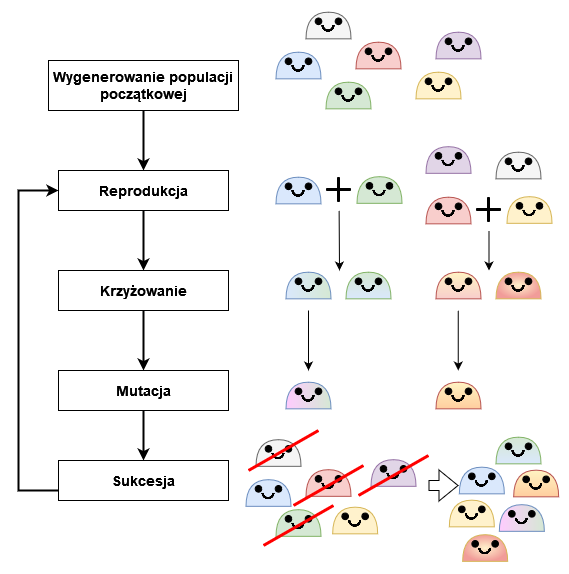

### Zastosowanie:

Ze względu na swój charakter typowymi zadaniami, w których algorytmy genetyczne znalazły zastosowanie, są zagadnienia związane z optymalizacją. 

Warto w tym miejscu wymienić zastosowania:

* w biznesie jako narzędzia optymalizacji kosztów i/lub zasobów w przedsiębiorstwie, szeregowania zadań, układania harmonogramów oraz modelowania finansowego;

* w zarządzaniu produkcją m.in. przy znajdowaniu odpowiednich parametrów dla maszyn, które potrzebują adekwatnych ilości surowców a jednocześnie konieczne jest ciągłe utrzymanie ich pracy;

* w lotnictwie, gdzie dostosowywano parametry konstrukcyjne skrzydeł do oporu oraz maksymalnej wagi i objętości paliwa;

* w transporcie przy znajdowaniu tras optymalnych, gdzie konieczne jest odwiedzenie przez kierowcę kilku punktów.



### Krótki słownik pojęć:


* Każdy osobnik posiada **genom** złożony z **chromosomów**. W najprostszym wypadku wystarczy nam 1 chromosom, będący wektorem zer lub jedynek o stałej długości. Genom **koduje** rozwiązanie problemu.

* **Funkcja przystosowania** określa jak dobrze osobnik jest przystosowany do środowiska. Jej argumentem jest genom osobnika, jej wyjściem - liczba rzeczywista.

* Podczas **reprodukcji** decydujemy, które osobniki będą mogły się rozmnożyć. O tym, jaka jest szansa rozmnożenia się osobnika, decyduje to, jak dobra jest wartość jego funkcji przystosowania. Najprostszą metodą reprodukcji jest **reprodukcja ruletkowa**, w której wagą do wylosowania jakiegoś osobnika jako rodzica jest wartość jego funkcji przystosowania.

* Podczas **krzyżowania** tworzymy nowe osobniki na podstawie wylosowanych par rodziców. Najprostszą metodą krzyżowania jest **krzyżowanie jednopunktowe**, w którym losujemy pozycję P z przedziału [0, długość chromosomu]. Dziecko odziedziczy geny na pozycjach (0, 1, ... P) po pierwszym rodzicu, a na pozycjach (P+1, P+2, ..., długość chromosomu) po drugim.

* Podczas **mutacji** dokonujemy małych losowych zmian w genach stworzonych dzieci, np. przez obrót bitu na losowej pozycji w chromosomie.

* Podczas **sukcesji** zastępujemy starą populację nową. W najprostszym przypadku po prostu usuwamy starą populację i na jej miejsce pojawia się populacja dzieci, ale w bardziej złożonych przypadkach można np. wybrać najlepsze osobniki, niezależnie od tego, czy są z nowej, czy starej populacji.

Krzyżowanie jednopunktowe zostało przedstawione poniżej:

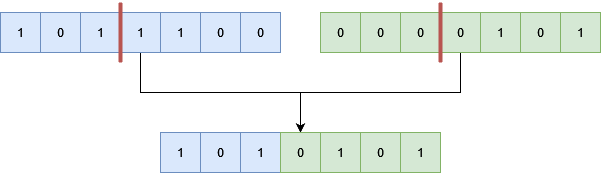

## Problemy rzeczywistoliczbowe

W problemach, w których chcemy, żeby chromosom był wektorem liczb rzeczywistych musimy zastosować odpowiednio bardziej złożone operatory mutacji i krzyżowania. Jeżeli każdy gen jest liczbą rzeczywistą, można skorzystać z krzyżowania typu blend. Jeżeli geny rodziców to $x_1, x_2, ..., x_n$ i $y_1, y_2, ..., y_n$, możemy stworzyć dziecko $u_1, u_2, ..., u_n$ losując każde $u_i$ z przedziału $[min(x_i, y_i)-\alpha(|x_i-y_i|), max(x_i, y_i)+\alpha(|x_i-y_i|)]$. Jest to tak zwane kodowanie typu blend.

Mutację natomiast można wykonać modyfikując losowy gen $x_i$ o liczbę z zakresu $[-0.1x_i, 0.1x_i]$

### Przykładowy problem

Chcemy znaleźć maksimum funkcji $f(x) = 3+0.3cos(25x-0.3)-(2x-0.2)^2$ na przedziale $[0,1]$. Można wyliczyć, że znajduje się ono w $x \approx 0.264828$ i wynosi ok. $ 3.29484$. Decydujemy, że zakodujemy rozwiązanie za pomocą wektora 16 bitów. Wektor będziemy interpretować jako liczbę w naturalnym systemie binarnym, a potem dzielić przez $2^{16}$, żeby otrzymać liczbę z przedziału $[0,1]$.

Implementacja algorytmów genetycznych jest często dokonywana przy użyciu programowania obiektowego. Jest to bardzo naturalne podejście, w którym każdy osobnik jest osobnym obiektem.



Możemy zobaczyć wygląd funkcji razem z jej ekstremum (użyty do tego został Wolfram Alpha):

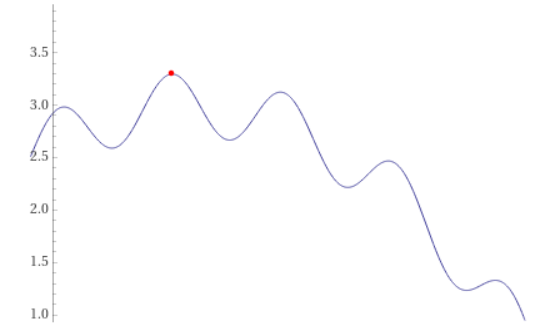

In [ ]:
import math
import random

In [ ]:
class Solution:
  def __init__(self, randomize_genes = False):
    self.genes = [0] * 16
    if randomize_genes:
     for i in range(8):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    number = int("".join(str(x) for x in self.genes), 2) / 2.**16 # sprytny sposób na konwersję wektora bitów do liczby całkowitej w jednej linijce
    return 3+0.2*math.cos(25*number-0.3)- (2*number-0.6)**2.
    #return 3 + math.pow(number, -1.*number) + 0.1*math.sin(100*number)
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    cut_position = random.randint(0,7)
    new_solution = Solution()
    new_solution.genes[0:cut_position] = self.genes[0:cut_position]
    new_solution.genes[cut_position:] = other_solution.genes[cut_position:]
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,7)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1

In [ ]:
# inicjalizujemy parametry:
population_size = 50
iterations = 50
mutation_chance = 0.2

# generujemy populację:
population = [Solution(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Solution()
best_solution_adaptation = 0.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**16., ' (correct: 0.264828)')
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation, ' (correct:  3.29484)')

Epoch:  0 ; avg adaptation:  2.5199476893806296 ; best adaptation:  3.1909829775275287  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  1 ; avg adaptation:  2.5683248548107436 ; best adaptation:  3.190823304300387  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  2 ; avg adaptation:  2.635242612524101 ; best adaptation:  3.1790010738668455  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  3 ; avg adaptation:  2.6707081852676673 ; best adaptation:  3.159343960432394  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  4 ; avg adaptation:  2.7133381051059944 ; best adaptation:  3.159343960432394  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  5 ; avg adaptation:  2.7366313877397075 ; best adaptation:  3.185979668439966  best adaptation ever:  3.1909829775275287  from iteration  0
Epoch:  6 ; avg adaptation:  2.6081952293043593 ; best adaptation:  3.185979668439966  best adaptation ever:  3

Teraz zobaczmy przebieg algorytmu:

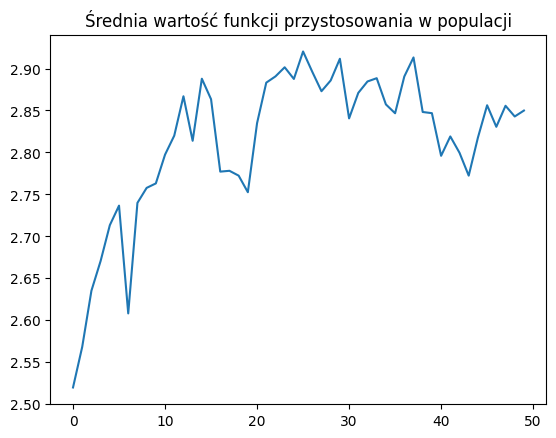

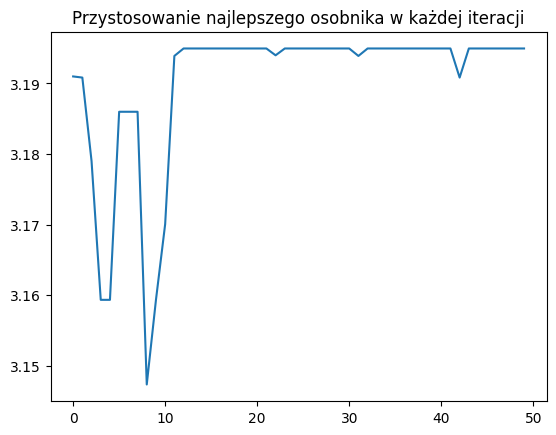

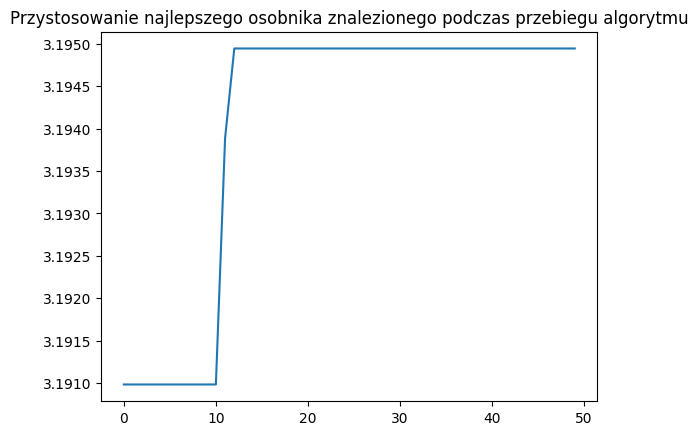

In [ ]:
import matplotlib.pyplot as plt

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w populacji")
plt.show()
print('    ')
plt.plot(bests_local)
plt.title("Przystosowanie najlepszego osobnika w każdej iteracji")
plt.show()
print('    ')
plt.plot(bests_global)
plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu algorytmu")
plt.show()

Przedstawiona implementacja algorytmu genetycznego ma wiele niedoskonałości. Należy też pamiętać, że jako algorytm niedeterministyczny, każde wywołanie algorytmu genetycznego może dać trochę inne wyniki.

## Zadania do samodzielnego wykonania

1.

Proszę zaproponować swoją implementację algorytmu genetycznego w celu znalezienia maksimum funkcji $f(x) = sin(100x+0.1) + x^{-x} + 0.2$ w przedziale $[0,1]$, dla $x=0$ proszę przyjąć $f(x) = 0$. Proszę porównać działanie algorytmu:

* Dla kodowania w naturalnym kodzie binarnym i w kodzie Graya

* Dla szansy mutacji wynoszącej 0, 0.1, 0.5 i 1.0

* Dla selekcji ruletkowej i dla selekcji progowej. W selekcji progowej dzielimy populację na dwie grupy: na $\gamma$% najlepszych i na pozostałych. Osobniki w grupie $\gamma$% najlepszych mają równą szansę na reprodukcję, pozostałe mają zerową szansę na reprodukcję. Proszę sprawdzić wyniki dla $\gamma$ wynoszącego 20 i 50.

Za każdym razem proszę podać średnie wyniki dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

2.

W naszej firmie są cztery działy: A, B, C i D. Generują różne zyski i różne koszty utrzymania, a ich efektywność jest wzajemnie od siebie zależna. Maksymalna ilość pracowników w każdym dziale przy obecnych warunkach to 255 ze względu na ograniczenia budżetu i przestrzeni biurowej. Funkcja miesięcznego zysku (po uwzględnieniu kosztów) w zależności od zatrudnionych w każdym dziale pracowników ma postać:

$Z(A, B, C, D) = 5000-\frac{600(x-20)^2(y-35)^2}{z}-(x-50)^2(w-48)^2+w$

Proszę zaproponować algorytm genetyczny (kodowanie problemu może być binarne, rzeczywistoliczbowe lub całkowitoliczbowe) i zaproponować wartość (A, B, C, D), dla której zyski firmy będą jak największe.

In [4]:
import math
import random

adaptation = lambda x: math.sin(100*x + 0.1) + x**(-x) + 0.2

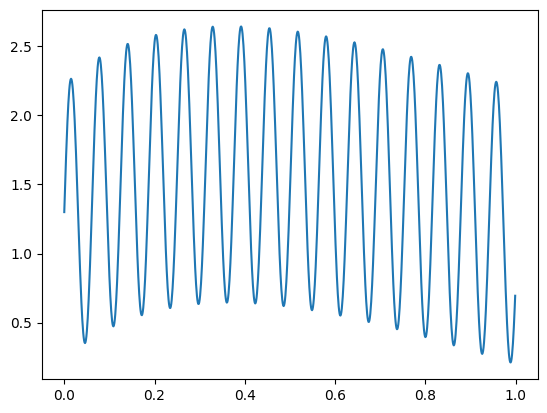

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 1, 0.001), [adaptation(x) for x in np.arange(0, 1, 0.001)])

In [6]:
correct_solution = 0.39169
adaptation(correct_solution)

2.6435779320462407

In [7]:
def gray_to_binary(arr):
    n = len(arr)
    binary = [arr[0]]
    for i in range(1, n):
        binary.append(int(binary[i-1] ^ int(arr[i])))
    return binary

In [9]:
class Item:
  def __init__(self, adaptation, randomize_genes = False):
    self.genes = [0] * 16
    self.adaptation = adaptation
    if randomize_genes:
     for i in range(8):
      if random.random() < 0.5:
        self.genes[i] = 0
      else:
        self.genes[i] = 1

  # funkcja przystosowania:
  def get_adaptation(self):
    # number = int("".join(str(x) for x in self.genes), 2) / 2.**16 # sprytny sposób na konwersję wektora bitów do liczby całkowitej w jednej linijce
    number = int("".join(str(x) for x in gray_to_binary(self.genes)), 2) / 2.**16 # sprytny sposób na konwersję wektora bitów do liczby całkowitej w jednej linijce
    
    return self.adaptation(number)
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, parent):
    cut_position = random.randint(0,15)
    first_child = Item(self.adaptation)
    second_child = Item(self.adaptation)
    first_child.genes[0:cut_position] = self.genes[0:cut_position]
    first_child.genes[cut_position:] = parent.genes[cut_position:]
    second_child.genes[0:cut_position] = parent.genes[0:cut_position]
    second_child.genes[cut_position:] = self.genes[cut_position:]
    return first_child, second_child

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    mutation_position = random.randint(0,15)
    if self.genes[mutation_position] == 1:
      self.genes[mutation_position] = 0
    else:
      self.genes[mutation_position] = 1

In [22]:
import math


population_size = 100
iterations = 10
mutation_chance = 1

population = [Item(adaptation, randomize_genes = True) for _ in range(population_size)]

best_solution = Item(adaptation)
best_solution_adaptation = 0.
best_iteration_found = 0

avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  adaptations = [p.get_adaptation() for p in population]
  
  local_best_solution = population[adaptations.index(max(adaptations))]
  if local_best_solution.get_adaptation() > best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", max(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(max(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  children = [p[0].crossover(p[1]) for p in parents]
  children = [item for sublist in children for item in sublist]

  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  population = children

  
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(max(adaptations))]
if local_best_solution.get_adaptation() > best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('---')
print('Best solution: ', best_solution.genes, ' = ', int("".join(str(x) for x in best_solution.genes), 2) / 2**16., ' (correct: 0.39169)')
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation, ' (correct: 2.6435779320462407 )')
print('błąd względny: ', abs(adaptation(correct_solution) - best_solution_adaptation)/ adaptation(correct_solution) * 100,'%' )




Epoch:  0 ; avg adaptation:  1.44489312081686 ; best adaptation:  2.6379099607637673  best adaptation ever:  2.6379099607637673  from iteration  0
Epoch:  1 ; avg adaptation:  1.468627172282196 ; best adaptation:  2.6418254765012477  best adaptation ever:  2.6418254765012477  from iteration  1
Epoch:  2 ; avg adaptation:  1.5885904903968284 ; best adaptation:  2.6377465475961923  best adaptation ever:  2.6418254765012477  from iteration  1
Epoch:  3 ; avg adaptation:  1.5817672627446209 ; best adaptation:  2.621735766063886  best adaptation ever:  2.6418254765012477  from iteration  1
Epoch:  4 ; avg adaptation:  1.5546895828217062 ; best adaptation:  2.6383863042719238  best adaptation ever:  2.6418254765012477  from iteration  1
Epoch:  5 ; avg adaptation:  1.6089474414798663 ; best adaptation:  2.643561136017113  best adaptation ever:  2.643561136017113  from iteration  5
Epoch:  6 ; avg adaptation:  1.6040566638985365 ; best adaptation:  2.639348975971023  best adaptation ever:  2.

In [28]:
abs(adaptation(correct_solution) - 2.6386967987479553)/ adaptation(correct_solution) * 100

0.18464117282546805

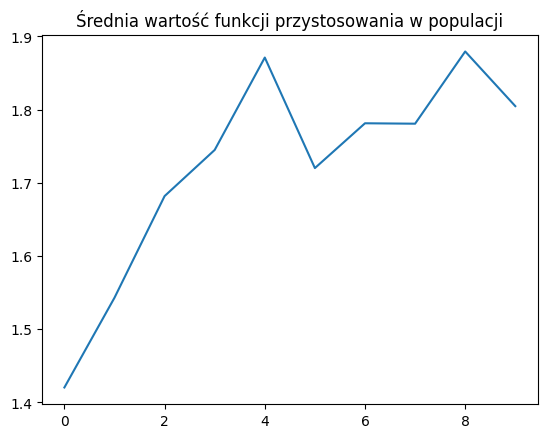

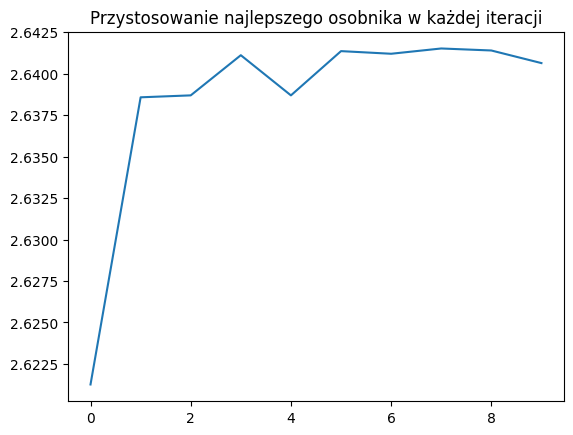

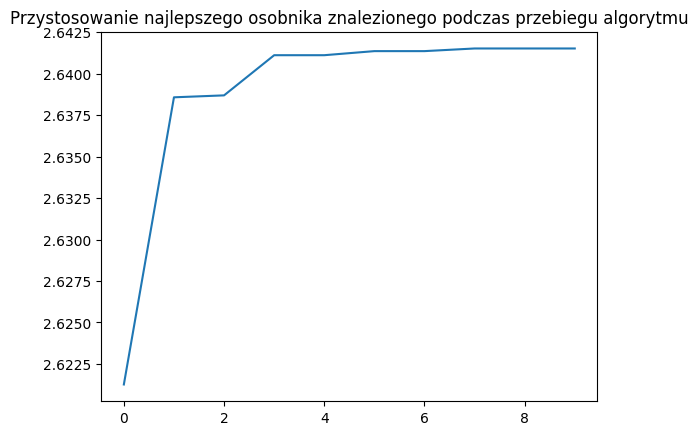

In [20]:
import matplotlib.pyplot as plt

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w populacji")
plt.show()
print('    ')
plt.plot(bests_local)
plt.title("Przystosowanie najlepszego osobnika w każdej iteracji")
plt.show()
print('    ')
plt.plot(bests_global)
plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu algorytmu")
plt.show()

W naszej firmie są cztery działy: A, B, C i D. Generują różne zyski i różne koszty utrzymania, a ich efektywność jest wzajemnie od siebie zależna. Maksymalna ilość pracowników w każdym dziale przy obecnych warunkach to 255 ze względu na ograniczenia budżetu i przestrzeni biurowej. Funkcja miesięcznego zysku (po uwzględnieniu kosztów) w zależności od zatrudnionych w każdym dziale pracowników ma postać:

$Z(A, B, C, D) = 5000-\frac{600(x-20)^2(y-35)^2}{z}-(x-50)^2(w-48)^2+w$

Proszę zaproponować algorytm genetyczny (kodowanie problemu może być binarne, rzeczywistoliczbowe lub całkowitoliczbowe) i zaproponować wartość (A, B, C, D), dla której zyski firmy będą jak największe.

In [23]:
def objective_function(x):
    a, b, c, d = x
    return 5000 - 600*((a-20)**2*(b-35)**2)/(c) - (a-50)**2*(d-48)**2 + d


In [92]:
def int_to_gray(n):
    gray = n ^ (n >> 1)
    binary = format(gray, '08b')
    return binary


In [93]:
def gray_to_int(gray):
    binary = '0' + gray
    n = int(binary, 2)
    original = n ^ (n >> 1)
    return original


In [119]:
import random

class Individual:
  def __init__(self, chromosome):
    self.chromosome = chromosome
  
  def crossover(self, other):
    if len(self.chromosome) != len(other.chromosome):
      raise ValueError("Chromosomes must have the same length.")
    
    child_chromosome = []
    for i in range(len(self.chromosome)):
      bin_first = f'0b{self.chromosome[i]:08b}'[2:]
      bin_other = f'0b{other.chromosome[i]:08b}'[2:]

      gray_first = int_to_gray(self.chromosome[i])
      gray_other = int_to_gray(other.chromosome[i])

      cut_position = random.randint(0, 7)

      bin_child = bin_first[:cut_position] + bin_other[cut_position:]

      gray_child = gray_first[:cut_position] + gray_other[cut_position:]
      int_child = gray_to_int(gray_child)
      
      # int_child = int(bin_child, 2)

      avg = (self.chromosome[i] + other.chromosome[i]) // 2

      child_chromosome.append(int_child)
    
    return Individual(child_chromosome)
  
  def mutation(self):
    mutated = self.chromosome.copy()
    for i in range(len(self.chromosome)):
      bin_number = f'0b{self.chromosome[i]:08b}'[2:]
      gray_number = int_to_gray(self.chromosome[i])

      mut_position = random.randint(0, 7)

      muntated_num = '1' if bin_number[mut_position] == '0' else '1'
      b = list(bin_number)[mut_position] = muntated_num
      bin_number = ''.join(b)

      muntated_num = '1' if gray_number[mut_position] == '0' else '1'
      g = list(gray_number)[mut_position] = muntated_num
      gray_number = ''.join(g)

      # int_number = int(bin_number, 2)

      int_number = gray_to_int(gray_number)
      self.chromosome[i] = int_number

    self.chromosome = mutated



In [48]:
import random

def generate_population(pop_size):
    population = []
    for i in range(pop_size):
        chromosome = [random.randint(1, 255) for _ in range(4)]
        population.append(Individual(chromosome))
    return population


Solution
Best solution:  [50, 35, 151, 70]
Best value:  5070.0


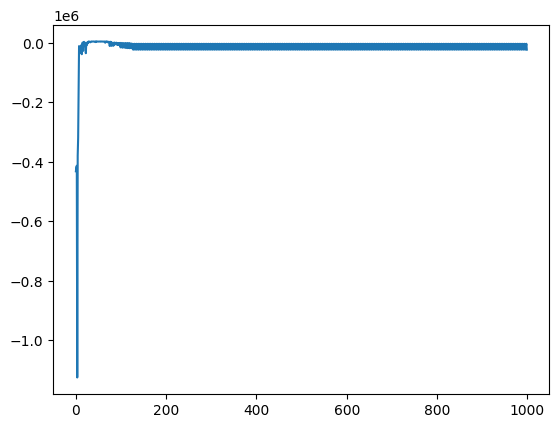

In [120]:
pop_size = 100
iterations = 1000

population = generate_population(pop_size)
best_solutions = []
best_adaptations = []

for iter in range(iterations):
  # wyliczenie wartości funkcji adaptacji
  adaptations = [objective_function(item.chromosome) for item in population]

  best_adaptation = max(adaptations)
  best_solution = population[adaptations.index(best_adaptation)]
  best_solutions.append(best_solution)
  best_adaptations.append(best_adaptation)

  # podział populacji kołem ruletki

  roulette_wheel = adaptations

  for i in range(len(roulette_wheel)):
    adaptation_range = max(adaptations) - min(adaptations)
    if adaptation_range == 0:
        roulette_wheel[i] = 1.0
    else:
        roulette_wheel[i] -= min(adaptations)
        roulette_wheel[i] /= adaptation_range

  # tworzymy z populacji dwie listę, ważoną kołem ruletki

  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  children = [p[0].crossover(p[1]) for p in parents]

  mutation_prob = 0.3

  for child in children:
    if random.random() < mutation_prob:
      child.mutation()

  population = children

very_best_solution = best_solutions[best_adaptations.index(max(best_adaptations))]

print('Solution')

print('Best solution: ', very_best_solution.chromosome)
print('Best value: ', objective_function(very_best_solution.chromosome))

plt.plot(best_adaptations)
plt.show()
